# Assignment 1

**Due to**: 23/12/2021 (dd/mm/yyyy)

**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES.

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!

So, when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general description of the task you have addressed and how you have addressed it
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis

# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the general setting of the problem
* 1 point for the handling of OOV terms
* 1 point for the models
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

This distribution of scores is tentative and we may decide to alter it at any moment.
We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. Similarly, in case of grave errors, we may decide to assign an equivalent malus (-0.5 points).

# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1036039/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.

### Preliminaries operations

In [5]:
#importing libraries
!unzip dependency_treebank.zip
!pip install simplejson
import simplejson as sj
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict 
import zipfile
import os
import urllib.request
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.initializers import Constant
from sklearn.manifold import TSNE
import random
from tqdm import tqdm #for progress bar
from scipy import spatial
import seaborn as sns
from keras.layers import Bidirectional

unzip:  cannot find or open dependency_treebank.zip, dependency_treebank.zip.zip or dependency_treebank.zip.ZIP.


   ### Importing Data
   We import Data from dependecy_treebank and we save it in a DataFrame that contains two column labels "word" where is collected each word, and in "class_id" where is collected each tag. 
   Then we show the Dataset.

In [6]:
list_word = []
list_class = []
data = []
train_ind: int
val_ind: int
for i in tqdm(range(1, 200)):
    if i<10:
        df = pd.read_table('/content/wsj_000{}.dp'.format(i), header = None)
    elif i>=10 and i<100:
        df = pd.read_table('/content/wsj_00{}.dp'.format(i), header = None)
    else:
        df = pd.read_table('/content/wsj_0{}.dp'.format(i), header = None)
    for j in range(0,df.shape[0]):
        list_word.append(df[0][j]) 
        list_class.append(df[1][j])
    if i==99:
        train_ind = len(list_word)
    elif i==149:
        val_ind = len(list_word)

data = list(zip(list_word,list_class))
df = pd.DataFrame(data, columns =['word', 'class_id'])

df.head(10)

100%|██████████| 199/199 [00:01<00:00, 103.98it/s]


,word,class_id
0,Pierre,NNP
1,Vinken,NNP
2,",",","
3,61,CD
4,years,NNS
5,old,JJ
6,",",","
7,will,MD
8,join,VB
9,the,DT


##Preprocessing

We've created the method df_cleaner that:

1.   Reset the index of the dataframe (due to the division of the dataset the Validation and Test set do NOT start with the correct index)

2.   Set lowercase all the words that are at the beginning of sentence and are not proper name, in     order to not have duplicate on the vocabulary (e.g. "the" and "The").

In [7]:
#setting lowercase and deleting punctuation
def df_cleaner(dataframe, label1,label2):
    dataframe = dataframe.reset_index()
    for i in range(0,dataframe.shape[0]-1):
        #punctuation removal
        if dataframe[label2][i] == '.' and dataframe[label2][i+1] != 'NNP':
            dataframe[label1][i+1] = str(dataframe[label1][i+1]).lower()
    '''dataframe = dataframe[dataframe[label2] != ',']
    dataframe = dataframe[dataframe[label2] != '``']
    dataframe = dataframe[dataframe[label2] != "''"]
    dataframe = dataframe[dataframe[label2] != ':']
    dataframe = dataframe[dataframe[label2] != '$']
    dataframe = dataframe[dataframe[label2] != '#']
    dataframe = dataframe[dataframe[label2] != '.']
    dataframe = dataframe.reset_index()'''
    return dataframe 


We've created the method df_cleaner_phrases that:

1.   Reset the index of the dataframe (due to the division of the dataset the Validation and Test set do NOT start with the correct index)

2.   Set lowercase all the words that are at the beginning of sentence and are not proper name, in     order to not have duplicate on the vocabulary (e.g. "the" and "The").

4. We divide the Dataset in phrases and we rename the labels in "phrase" instead of "word" and       "phrase_class_id" instead of "class_id



In [8]:
#setting lowercase
def df_cleaner_phrases(dataframe, label1,label2):
    dataframe = dataframe.reset_index()
    for i in range(0,dataframe.shape[0]-1):
        if dataframe[label2][i] == '.' and dataframe[label2][i+1] != 'NNP':
            dataframe[label1][i+1] = str(dataframe[label1][i+1]).lower()
  
    #phrase division
    phrase= []
    phrases=[]
    class_phrase= []
    class_phrases=[]
    for i in tqdm(range(0,len(dataframe))): 
        name = dataframe[label1][i]
        phrase.append(dataframe[label1][i])
        class_phrase.append(dataframe[label2][i]) 

        if name=='.' : 
            class_phrases.append(class_phrase)
            phrases.append(phrase)
            class_phrase = []
            phrase = []
    
    # phrase dataframe created
    data = list(zip(phrases,class_phrases))
    df_phrases = pd.DataFrame(data, columns =['phrase', 'phrase_class_id']) 

    return df_phrases 


In [9]:
#dataset composed by words and class_id divided in training, validation and test set
df_train = df[0:train_ind] 
df_val = df[train_ind:val_ind] 
df_test = df[val_ind::] 

#cleaning the whole dataframe
df_cleaned = df_cleaner(df,'word','class_id')

#dataset composed by phrases and class_id divided in training, validation and test set
df_train_cleaned = df_cleaner(df_train,'word','class_id')
df_val_cleaned = df_cleaner(df_val,'word','class_id')
df_test_cleaned = df_cleaner(df_test,'word','class_id')

#cleaning the whole dataframe phrases
df_phrases = df_cleaner_phrases(df,'word','class_id')

#df_phrases_train = df_cleaner(df_train,'word','class_id')
df_phrases_train = df_cleaner_phrases(df_train,'word','class_id')
df_phrases_val = df_cleaner_phrases(df_val,'word','class_id')
df_phrases_test = df_cleaner_phrases(df_test,'word','class_id')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 15709/15709 [00:00<00:00, 44291.04it/s]


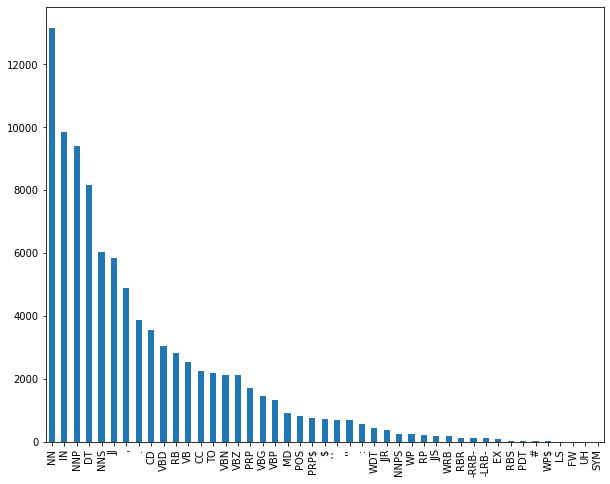

In [10]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

df_cleaned["class_id"].value_counts().plot.bar()

In [11]:
#showing the training set divided in phrases 
#df_train_cleaned.head(10)
df_phrases.head(10)

,phrase,phrase_class_id
0,"[Pierre, Vinken, ,, 61, years, old, ,, will, j...","[NNP, NNP, ,, CD, NNS, JJ, ,, MD, VB, DT, NN, ..."
1,"[Mr., Vinken, is, chairman, of, Elsevier, N.V....","[NNP, NNP, VBZ, NN, IN, NNP, NNP, ,, DT, NNP, ..."
2,"[Rudolph, Agnew, ,, 55, years, old, and, forme...","[NNP, NNP, ,, CD, NNS, JJ, CC, JJ, NN, IN, NNP..."
3,"[a, form, of, asbestos, once, used, to, make, ...","[DT, NN, IN, NN, RB, VBN, TO, VB, NNP, NN, NNS..."
4,"[the, asbestos, fiber, ,, crocidolite, ,, is, ...","[DT, NN, NN, ,, NN, ,, VBZ, RB, JJ, IN, PRP, V..."
5,"[Lorillard, Inc., ,, the, unit, of, New, York-...","[NNP, NNP, ,, DT, NN, IN, JJ, JJ, NNP, NNP, WD..."
6,"[although, preliminary, findings, were, report...","[IN, JJ, NNS, VBD, VBN, RBR, IN, DT, NN, IN, ,..."
7,"[a, Lorillard, spokewoman, said, ,, ``, This, ...","[DT, NNP, NN, VBD, ,, ``, DT, VBZ, DT, JJ, NN, .]"
8,"[we, 're, talking, about, years, ago, before, ...","[PRP, VBP, VBG, IN, NNS, IN, IN, NN, VBD, IN, ..."
9,"[there, is, no, asbestos, in, our, products, n...","[EX, VBZ, DT, NN, IN, PRP$, NNS, RB, .]"


### Dataframes's tokenization

We created the method tokenization that tokenize taking in input that dataframe and returns phrases,classes_id, tokenizer_phrase and tokenizer_class_id

In [12]:
#tokenization 
def tokenization(df_phrases_divided):
  tokenizer_phrase = Tokenizer()
  tokenizer_class_id=Tokenizer()

  tokenizer_phrase.fit_on_texts(df_phrases["phrase"])
  tokenizer_class_id.fit_on_texts(df_phrases["phrase_class_id"])

  X_encoded = tokenizer_phrase.texts_to_sequences(df_phrases_divided["phrase"])

  y_encoded = tokenizer_class_id.texts_to_sequences(df_phrases_divided["phrase_class_id"])

  print("** Raw data point **", "\n", "-"*100, "\n") 
  print('X: ', df_phrases_divided["phrase"][0], '\n') 
  print('Y: ', df_phrases_divided["phrase_class_id"][0], '\n') 
  print() 
  print("** Encoded data point **", "\n", "-"*100, "\n") 
  print('X: ', X_encoded[0], '\n') 
  print('Y: ', y_encoded[0], '\n')
  print(len(X_encoded))
  print(len(y_encoded))
  print(df_phrases.shape)

  return X_encoded, y_encoded, tokenizer_phrase, tokenizer_class_id

In [13]:
#tokenization of the training set
X_encoded_train,y_encoded_train,tokenizer_phrase_train,tokenizer_class_id_train = tokenization(df_phrases_train)

** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  ['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.'] 

Y:  ['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.'] 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [5419, 3714, 1, 2005, 78, 316, 1, 39, 2383, 2, 122, 22, 6, 2006, 317, 444, 2007, 3] 

Y:  [3, 3, 7, 9, 5, 6, 7, 20, 12, 4, 1, 2, 4, 6, 1, 3, 9, 8] 

1896
1896
(3828, 2)


In [14]:
#tokenization of the validation set
X_encoded_val,y_encoded_val,tokenizer_phrase_val,tokenizer_class_id_val = tokenization(df_phrases_val)

** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  ['For', 'six', 'years', ',', 'T.', 'Marshall', 'Hahn', 'Jr.', 'has', 'made', 'corporate', 'acquisitions', 'in', 'the', 'George', 'Bush', 'mode', ':', 'kind', 'and', 'gentle', '.'] 

Y:  ['IN', 'CD', 'NNS', ',', 'NNP', 'NNP', 'NNP', 'NNP', 'VBZ', 'VBN', 'JJ', 'NNS', 'IN', 'DT', 'NNP', 'NNP', 'NN', ':', 'JJ', 'CC', 'JJ', '.'] 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [10, 332, 78, 1, 1037, 1880, 556, 977, 31, 169, 328, 1214, 7, 2, 2118, 226, 8268, 67, 799, 8, 8269, 3] 

Y:  [2, 9, 5, 7, 3, 3, 3, 3, 16, 15, 6, 5, 2, 4, 3, 3, 1, 26, 6, 13, 6, 8] 

1287
1287
(3828, 2)


In [15]:
#tokenization of the test set
X_encoded_test,y_encoded_test,tokenizer_phrase_test, tokenizer_class_id_test = tokenization(df_phrases_test)

** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  ['A.L.', 'Williams', 'Corp.', 'was', 'merged', 'into', 'Primerica', 'Corp.', ',', 'New', 'York', ',', 'after', 'a', 'special', 'meeting', 'of', 'Williams', 'shareholders', 'cleared', 'the', 'transaction', ',', 'the', 'companies', 'said', '.'] 

Y:  ['NNP', 'NNP', 'NNP', 'VBD', 'VBN', 'IN', 'NNP', 'NNP', ',', 'NNP', 'NNP', ',', 'IN', 'DT', 'JJ', 'NN', 'IN', 'NNP', 'NNS', 'VBD', 'DT', 'NN', ',', 'DT', 'NNS', 'VBD', '.'] 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [5305, 1216, 76, 28, 4330, 103, 2869, 76, 1, 33, 85, 1, 100, 6, 761, 703, 4, 1216, 563, 10080, 2, 564, 1, 2, 146, 16, 3] 

Y:  [3, 3, 3, 10, 15, 2, 3, 3, 7, 3, 3, 7, 2, 4, 6, 1, 2, 3, 5, 10, 4, 1, 7, 4, 5, 10, 8] 

645
645
(3828, 2)


In [16]:
#tokenization of ALL DATA
X_encoded,y_encoded,tokenizer_phrase,tokenizer_class_id = tokenization(df_phrases)
X_decoded = tokenizer_phrase.sequences_to_texts(X_encoded)

** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  ['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.'] 

Y:  ['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.'] 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [5419, 3714, 1, 2005, 78, 316, 1, 39, 2383, 2, 122, 22, 6, 2006, 317, 444, 2007, 3] 

Y:  [3, 3, 7, 9, 5, 6, 7, 20, 12, 4, 1, 2, 4, 6, 1, 3, 9, 8] 

3828
3828
(3828, 2)


In [17]:
print(tokenizer_class_id.word_index)

{'nn': 1, 'in': 2, 'nnp': 3, 'dt': 4, 'nns': 5, 'jj': 6, ',': 7, '.': 8, 'cd': 9, 'vbd': 10, 'rb': 11, 'vb': 12, 'cc': 13, 'to': 14, 'vbn': 15, 'vbz': 16, 'prp': 17, 'vbg': 18, 'vbp': 19, 'md': 20, 'pos': 21, 'prp$': 22, '$': 23, '``': 24, "''": 25, ':': 26, 'wdt': 27, 'jjr': 28, 'nnps': 29, 'wp': 30, 'rp': 31, 'jjs': 32, 'wrb': 33, 'rbr': 34, '-rrb-': 35, '-lrb-': 36, 'ex': 37, 'rbs': 38, 'pdt': 39, '#': 40, 'wp$': 41, 'ls': 42, 'fw': 43, 'uh': 44, 'sym': 45}


In [18]:
#We check that each sequence of input and output is same length 
 
different_length = [1 if len(input) != len(output) else 0 for input, output in zip(X_encoded_train, y_encoded_train)] 
print("{} sentences have disparate input-output lengths.".format(sum(different_length)))

0 sentences have disparate input-output lengths.


# Padding the dataframe

We created the method longest_sentence to check the longest sentence in the dataframe

In [19]:
#PADDING
# check length of longest sentence
def longest_sentence(X_encoded):
  lengths = [len(seq) for seq in X_encoded] 
  print("Length of longest sentence: {}".format(max(lengths))) 
  sns.boxplot(lengths) 
  plt.show()
  return max(lengths)

Length of longest sentence: 250


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


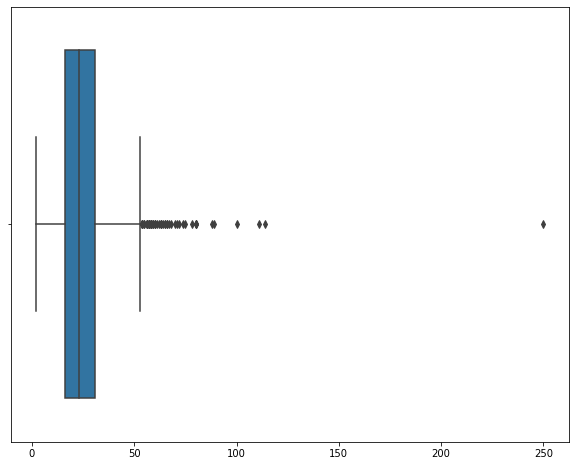

In [20]:
#Found the longest sentence in the training set
MAX_SEQUENCE = longest_sentence(X_encoded)

In [21]:
#Found the longest sentence in the validation set
#MAX_SEQUENCE_VAL = 171 #longest_sentence(X_encoded_val)

In [22]:
#Found the longest sentence in the test set
#MAX_SEQUENCE_TEST = longest_sentence(X_encoded_test)

We created the method padding to create the padding of the dataframe with the correct length

In [23]:
#PADDING pad_sequences
def padding(X_encoded, y_encoded, MAX_SEQ_LENGTH):
  X_padded = pad_sequences(X_encoded,MAX_SEQ_LENGTH)
  y_padded = pad_sequences(y_encoded,MAX_SEQ_LENGTH)
  return X_padded, y_padded


In [24]:
#padding creation for the training set
X_padded_train, y_padded_train = padding(X_encoded_train, y_encoded_train, MAX_SEQUENCE)

In [25]:
#padding creation for the validation set
X_padded_val, y_padded_val = padding(X_encoded_val, y_encoded_val,  MAX_SEQUENCE)

In [26]:
#padding creation for the training set
X_padded_test,y_padded_testt = padding(X_encoded_test,y_encoded_test,  MAX_SEQUENCE)

In [27]:
#padding creation for all data set
X_padded,y_padded = padding(X_encoded,y_encoded, MAX_SEQUENCE)

In [28]:
#we show a word's padding of the training set
'''print(X_padded_train[0], "\n"*3) 
print(y_padded_train[0])'''

'print(X_padded_train[0], "\n"*3) \nprint(y_padded_train[0])'

Adding the padding to tokenizers

In [29]:
tokenizer_class_id.word_index[0]=0
tokenizer_class_id.index_word[0]=0
tokenizer_class_id_test.word_index[0]=0
tokenizer_class_id_val.word_index[0]=0
tokenizer_class_id_train.word_index[0]=0

tokenizer_phrase.word_index[0]=0
tokenizer_phrase_test.word_index[0]=0
tokenizer_phrase_val.word_index[0]=0
tokenizer_phrase_train.word_index[0]=0


In [30]:
print(dict(tokenizer_class_id.word_index)[0])
print(tokenizer_class_id_test.word_index)

0
{'nn': 1, 'in': 2, 'nnp': 3, 'dt': 4, 'nns': 5, 'jj': 6, ',': 7, '.': 8, 'cd': 9, 'vbd': 10, 'rb': 11, 'vb': 12, 'cc': 13, 'to': 14, 'vbn': 15, 'vbz': 16, 'prp': 17, 'vbg': 18, 'vbp': 19, 'md': 20, 'pos': 21, 'prp$': 22, '$': 23, '``': 24, "''": 25, ':': 26, 'wdt': 27, 'jjr': 28, 'nnps': 29, 'wp': 30, 'rp': 31, 'jjs': 32, 'wrb': 33, 'rbr': 34, '-rrb-': 35, '-lrb-': 36, 'ex': 37, 'rbs': 38, 'pdt': 39, '#': 40, 'wp$': 41, 'ls': 42, 'fw': 43, 'uh': 44, 'sym': 45, 0: 0}


 ##  GloVe 
 We start downloading GloVe

In [31]:
url = "https://nlp.stanford.edu/data/glove.6B.zip"

glove_path = os.path.join(os.getcwd(),"Glove")
glove_zip = os.path.join(os.getcwd(),"Glove", "glove.6B.zip")

if not os.path.exists(glove_path):
    os.makedirs(glove_path)

if not os.path.exists(glove_zip):
    urllib.request.urlretrieve(url, glove_zip)
    print("Successful download")

with zipfile.ZipFile(glove_zip, 'r') as zip_ref:
    zip_ref.extractall(path=glove_path)
    print("Successful extraction")

Successful download
Successful extraction


In [32]:
print(tokenizer_class_id.word_index) #SI PUò CANCELLARE?

{'nn': 1, 'in': 2, 'nnp': 3, 'dt': 4, 'nns': 5, 'jj': 6, ',': 7, '.': 8, 'cd': 9, 'vbd': 10, 'rb': 11, 'vb': 12, 'cc': 13, 'to': 14, 'vbn': 15, 'vbz': 16, 'prp': 17, 'vbg': 18, 'vbp': 19, 'md': 20, 'pos': 21, 'prp$': 22, '$': 23, '``': 24, "''": 25, ':': 26, 'wdt': 27, 'jjr': 28, 'nnps': 29, 'wp': 30, 'rp': 31, 'jjs': 32, 'wrb': 33, 'rbr': 34, '-rrb-': 35, '-lrb-': 36, 'ex': 37, 'rbs': 38, 'pdt': 39, '#': 40, 'wp$': 41, 'ls': 42, 'fw': 43, 'uh': 44, 'sym': 45, 0: 0}


#Embeddings' creation

In [33]:
#size of the vocabularies 
EMBEDDING_SIZE  = 50  # dimensions of the features of GloVe 
VOCABULARY_SIZE_TRAIN = len(tokenizer_phrase_train.word_index) + 1 
VOCABULARY_SIZE_VAL = len(tokenizer_phrase_val.word_index) + 1 
VOCABULARY_SIZE_TEST = len(tokenizer_phrase_test.word_index) + 1 

VOCABULARY_SIZE = len(tokenizer_phrase.word_index) + 1 

# create an empty embedding matix 
embedding_weights_train = np.zeros((VOCABULARY_SIZE_TRAIN, EMBEDDING_SIZE)) 
embedding_weights_val = np.zeros((VOCABULARY_SIZE_VAL, EMBEDDING_SIZE)) 
embedding_weights_test = np.zeros((VOCABULARY_SIZE_TEST, EMBEDDING_SIZE)) 

embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE)) 


# create a word to index dictionary mapping 
word2id_train = tokenizer_phrase_train.word_index
word2id_val= tokenizer_phrase_val.word_index
word2id_test = tokenizer_phrase_test.word_index

word2id = tokenizer_phrase.word_index

Now we create the word embeddings of GloVe V1



In [34]:
V1 = {}
glove_path = '/content/Glove'
with open(glove_path + '/glove.6B.{}d.txt'.format(EMBEDDING_SIZE),'r', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:],'float32')
        V1[word]=vector
        
print("Found %s word vectors." % len(V1))

Found 400000 word vectors.


We created the method OOV_terms that create the out of vocabulary



In [35]:
def OOV_terms(embedding_model, word_listing):
    embedding_vocabulary = set(embedding_model)
    oov = set(word_listing).difference(embedding_vocabulary)
    return list(oov)

In [36]:
#Generation of all vocabularies and out of vocabularies
OOV1 = OOV_terms(V1.keys(), np.sort(df_train_cleaned['word'].unique()))

V2= list(V1)+OOV1

OOV2 = OOV_terms(V2, np.sort(df_val_cleaned['word'].unique()))
V3= list(V2)+OOV2

OOV3 = OOV_terms(V3, np.sort(df_test_cleaned['word'].unique()))
V4= list(V3)+OOV3

In [37]:
print("Total OOV1 terms: {0} ({1:.2f}%)".format(len(OOV1), float(len(OOV1))*100 / len(df_train['word'].unique())))
print("Total OOV2 terms: {0} ({1:.2f}%)".format(len(OOV2), float(len(OOV2))*100 / len(df_val['word'].unique())))
print("Total OOV3 terms: {0} ({1:.2f}%)".format(len(OOV3), float(len(OOV3))*100 / len(df_test['word'].unique())))

print(len(V2))

Total OOV1 terms: 2136 (27.03%)
Total OOV2 terms: 864 (14.38%)
Total OOV3 terms: 426 (11.70%)
402136


In [38]:
df_train_cleaned['word'].unique() #SI PUO CANCELLARE?

array(['Pierre', 'Vinken', ',', ..., 'navigation', '29.4', 'intelligence'],
      dtype=object)

Computing embeddings with the method compute_embedding

In [39]:
#We created this method to generate all the embeddings that we need
#It checks if a word exists in the vocabulary, in that case tries to adds the corresponding features of V1(if they exist), else adds random features of V1
#Then it returns the embedding
def compute_embedding(word2id, vocabulary,embedding_weights):
  for word, index in tqdm(word2id.items()):
    if word in vocabulary:
      try: 
        embedding_weights[index, :] = V1[word] 
      except KeyError:
          embedding_weights[index, :] = np.random.uniform(random.choice(list(V1.values())))
          pass
  return embedding_weights

In [40]:
#embedding train
embedding_V2 = compute_embedding(word2id_train,V2,embedding_weights_train)
#embedding validation
embedding_V3 = compute_embedding(word2id_val, V3, embedding_weights_val)
#embedding test
embedding_V4 = compute_embedding(word2id_test, V4, embedding_weights_test)

100%|██████████| 10948/10948 [00:14<00:00, 760.90it/s]


In [41]:
# We show the embedding of a word
embedding_V2[tokenizer_phrase_train.word_index[0]]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [42]:
#we do the categorical to classes padded (?) 
#y_padded_train = to_categorical(y_padded_train,num_classes=40)
#y_padded_val = to_categorical(y_padded_val,num_classes=40)
#y_padded_test = to_categorical(y_padded_test)

y_padded = to_categorical(y_padded)

In [43]:
y_padded_val.shape #SI PUO CANCELLARE?
y_padded.shape

(3828, 250, 46)

In [44]:
y_padded_train = y_padded[0:1896]
y_padded_val = y_padded[1896:1896+1287]
y_padded_test = y_padded[1896+1287:]

In [45]:
print(tokenizer_class_id.word_index)

{'nn': 1, 'in': 2, 'nnp': 3, 'dt': 4, 'nns': 5, 'jj': 6, ',': 7, '.': 8, 'cd': 9, 'vbd': 10, 'rb': 11, 'vb': 12, 'cc': 13, 'to': 14, 'vbn': 15, 'vbz': 16, 'prp': 17, 'vbg': 18, 'vbp': 19, 'md': 20, 'pos': 21, 'prp$': 22, '$': 23, '``': 24, "''": 25, ':': 26, 'wdt': 27, 'jjr': 28, 'nnps': 29, 'wp': 30, 'rp': 31, 'jjs': 32, 'wrb': 33, 'rbr': 34, '-rrb-': 35, '-lrb-': 36, 'ex': 37, 'rbs': 38, 'pdt': 39, '#': 40, 'wp$': 41, 'ls': 42, 'fw': 43, 'uh': 44, 'sym': 45, 0: 0}


#LSTM Neural Network

We have created the method model_creation that creates the model

In [46]:
# create architecture
def model_creation(y_padded, VOC_SIZE, MAX_SEQ_LENGTH, embedding):
  NUM_CLASSES = y_padded.shape[2]
  lstm_model = Sequential()
  lstm_model.add(Embedding(input_dim    = VOC_SIZE,         # vocabulary size - number of unique words in data
                          output_dim    = EMBEDDING_SIZE,          # length of vector with which each word is represented
                          input_length  = MAX_SEQ_LENGTH,          # length of input sequence
                          weights       = [embedding],     # word embedding matrix
                          trainable     = False                     # True - update embeddings_weight matrix
  ))
  lstm_model.add(Bidirectional(LSTM(64, return_sequences=True),input_shape=(46, 1)))
  lstm_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))
  lstm_model.compile(loss     =  'categorical_crossentropy',
                    optimizer =  'adam',
                    metrics   =  ['acc'])
  lstm_model.summary()
  return lstm_model

We have created the method fit_model that fit the model

In [47]:
def fit_model(X_padded_t,y_padded_t,lstm_model,X_padded_v,y_padded_v):
  lstm_fitted= lstm_model.fit(X_padded_t, y_padded_t, batch_size=128, epochs=50, validation_data=(X_padded_v,y_padded_v))
  return lstm_fitted

We creater the method plot_accuracy that plots the accuracy of the model

In [48]:
# visualizing the accuracy
def plot_accuracy(model_fitted):
  plt.plot(model_fitted.history['acc'])
  plt.plot(model_fitted.history['val_acc'])
  plt.title(name,' model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Training Accuracy','Validation Accuracy'], loc="lower right")
  plt.show()

In [49]:
#Visualizing the loss
def plot_loss(model_fitted):
  loss_train = model_fitted.history['loss']
  loss_val = model_fitted.history['val_loss']
  epochs = range(1,51)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='Validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

### LSTM Model

In [50]:
#Model creation
lstm_model = model_creation(y_padded_train,VOCABULARY_SIZE_TRAIN, MAX_SEQUENCE, embedding_V4)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 50)           547450    
                                                                 
 bidirectional (Bidirectiona  (None, 250, 128)         58880     
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 250, 46)          5934      
 ibuted)                                                         
                                                                 
Total params: 612,264
Trainable params: 64,814
Non-trainable params: 547,450
_________________________________________________________________


In [51]:
#Fitting the model
lstm= fit_model(X_padded_train, y_padded_train, lstm_model,X_padded_val,y_padded_val)

Epoch 1/50
15/15 [==============================] - 10s 221ms/step - loss: 3.5858 - acc: 0.8794 - val_loss: 2.5677 - val_acc: 0.9101
Epoch 2/50
15/15 [==============================] - 2s 145ms/step - loss: 0.8485 - acc: 0.9062 - val_loss: 0.4124 - val_acc: 0.9056
Epoch 3/50
15/15 [==============================] - 2s 132ms/step - loss: 0.3465 - acc: 0.9141 - val_loss: 0.3208 - val_acc: 0.9194
Epoch 4/50
15/15 [==============================] - 2s 119ms/step - loss: 0.3048 - acc: 0.9226 - val_loss: 0.2990 - val_acc: 0.9231
Epoch 5/50
15/15 [==============================] - 2s 116ms/step - loss: 0.2870 - acc: 0.9240 - val_loss: 0.2851 - val_acc: 0.9241
Epoch 6/50
15/15 [==============================] - 2s 115ms/step - loss: 0.2747 - acc: 0.9270 - val_loss: 0.2733 - val_acc: 0.9287
Epoch 7/50
15/15 [==============================] - 2s 114ms/step - loss: 0.2635 - acc: 0.9318 - val_loss: 0.2621 - val_acc: 0.9343
Epoch 8/50
15/15 [==============================] - 2s 113ms/step - loss: 0

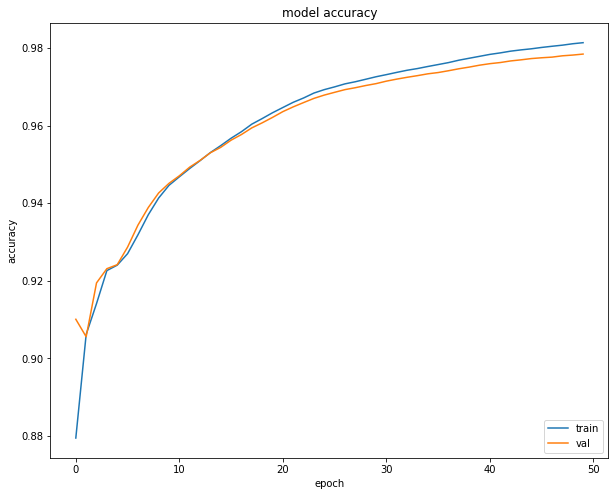

In [52]:
#Plotting LSTM model's accuracy
plot_accuracy(lstm)

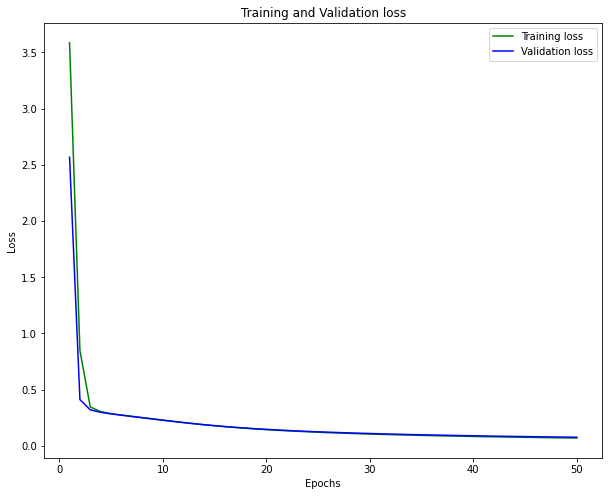

In [53]:
#Plotting LSTM model's loss
plot_loss(lstm)

# GRU Neural Network

In [62]:
#Creating the model
def gru_model(y_padded,VOCABULARY_SIZE,MAX_SEQ_LENGTH, embedding):
  NUM_CLASSES = y_padded.shape[2]
  gru_model = Sequential()
  gru_model.add(Embedding(input_dim     = VOCABULARY_SIZE,
                          output_dim    = EMBEDDING_SIZE,
                          input_length  = MAX_SEQ_LENGTH,
                          weights       = [embedding],
                          trainable     = False
  ))
  gru_model.add(GRU(64, return_sequences=True))
  gru_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))
  gru_model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['acc'])
  gru_model.summary()
  return gru_model

In [63]:
#Fitting the model
def fit_gru_model(X_padded,y_padded,gru_model,X_padded_val,y_padded_val):
  gru = gru_model.fit(X_padded, y_padded, batch_size=128, epochs=50,validation_data=(X_padded_val,y_padded_val))
  return gru

In [64]:
#Model creation
gru_model = gru_model(y_padded,VOCABULARY_SIZE, MAX_SEQUENCE, embedding_V4)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 50)           547450    
                                                                 
 gru_1 (GRU)                 (None, 250, 64)           22272     
                                                                 
 time_distributed_2 (TimeDis  (None, 250, 46)          2990      
 tributed)                                                       
                                                                 
Total params: 572,712
Trainable params: 25,262
Non-trainable params: 547,450
_________________________________________________________________


In [65]:
#Fitting the model
gru = fit_gru_model(X_padded_train, y_padded_train, gru_model,X_padded_val,y_padded_val)

Epoch 1/50
15/15 [==============================] - 4s 122ms/step - loss: 3.6823 - acc: 0.9112 - val_loss: 3.4207 - val_acc: 0.9174
Epoch 2/50
15/15 [==============================] - 1s 81ms/step - loss: 2.1350 - acc: 0.9175 - val_loss: 0.4951 - val_acc: 0.9121
Epoch 3/50
15/15 [==============================] - 1s 79ms/step - loss: 0.4573 - acc: 0.9140 - val_loss: 0.4135 - val_acc: 0.9179
Epoch 4/50
15/15 [==============================] - 1s 80ms/step - loss: 0.3825 - acc: 0.9212 - val_loss: 0.3638 - val_acc: 0.9236
Epoch 5/50
15/15 [==============================] - 1s 79ms/step - loss: 0.3468 - acc: 0.9249 - val_loss: 0.3391 - val_acc: 0.9256
Epoch 6/50
15/15 [==============================] - 1s 80ms/step - loss: 0.3265 - acc: 0.9277 - val_loss: 0.3221 - val_acc: 0.9288
Epoch 7/50
15/15 [==============================] - 1s 80ms/step - loss: 0.3109 - acc: 0.9308 - val_loss: 0.3077 - val_acc: 0.9319
Epoch 8/50
15/15 [==============================] - 1s 80ms/step - loss: 0.2972 - 

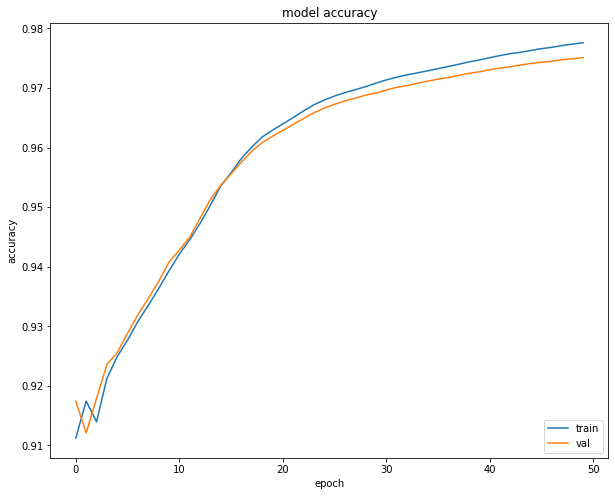

In [66]:
#Plotting the GRU model's accuracy
plot_accuracy(gru)

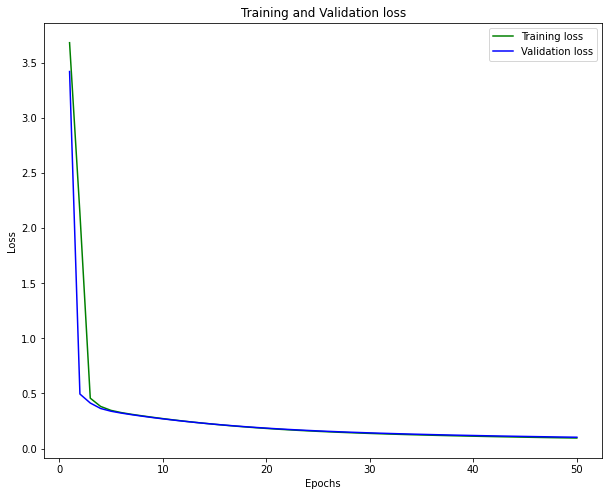

In [67]:
#Plotting GRU model's loss
plot_loss(gru)

#Method for custom Accuracy
With this method we ignore the padding and the punctuation from the accuracy

In [75]:
from keras import backend as K
 
def ignore_class_accuracy():
    def ignore_accuracy(y_true, y_pred):
        y_true_class = K.argmax(y_true, axis=-1)
        y_pred_class = K.argmax(y_pred, axis=-1)
        to_ignore = [0, 8, 23, 24, 25, 26, 40]  #'.': 8,'$': 23, '``': 24, "''": 25, ':': 26,'#': 40
        for i in to_ignore:
          ignore_mask = K.cast(K.not_equal(y_pred_class, i), 'int32')
        matches = K.cast(K.equal(y_true_class, y_pred_class), 'int32') * ignore_mask
        accuracy = K.sum(matches) / K.maximum(K.sum(ignore_mask), 1)
        return accuracy
    return ignore_accuracy

#LSTM Custom Accuracy

In [76]:
#Creation LSTM model with custom accuracy
NUM_CLASSES = y_padded.shape[2]
lstm_model_acc = Sequential()
lstm_model_acc.add(Embedding(input_dim    = VOCABULARY_SIZE,         # vocabulary size - number of unique words in data
                        output_dim        = EMBEDDING_SIZE,          # length of vector with which each word is represented
                        input_length      = MAX_SEQUENCE,          # length of input sequence
                        weights           = [embedding_V4],     # word embedding matrix
                        trainable         = False                     # True - update embeddings_weight matrix
))
lstm_model_acc.add(Bidirectional(LSTM(64, return_sequences=True),input_shape=(46, 1)))
lstm_model_acc.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))
lstm_model_acc.compile(loss     =  'categorical_crossentropy',
                  optimizer     =  'adam',
                  metrics       =  ['acc',ignore_class_accuracy()])
lstm_model_acc.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 250, 50)           547450    
                                                                 
 bidirectional_3 (Bidirectio  (None, 250, 128)         58880     
 nal)                                                            
                                                                 
 time_distributed_5 (TimeDis  (None, 250, 46)          5934      
 tributed)                                                       
                                                                 
Total params: 612,264
Trainable params: 64,814
Non-trainable params: 547,450
_________________________________________________________________


In [77]:
#Fitting the LSTM model with custom accuracy
lstm_acc = lstm_model_acc.fit(X_padded, y_padded, batch_size=128, epochs=50,validation_data=(X_padded_val,y_padded_val))

Epoch 1/50
30/30 [==============================] - 9s 169ms/step - loss: 2.2540 - acc: 0.8906 - ignore_accuracy: 0.8913 - val_loss: 0.4374 - val_acc: 0.9061 - val_ignore_accuracy: 0.9075
Epoch 2/50
30/30 [==============================] - 4s 119ms/step - loss: 0.3305 - acc: 0.9190 - ignore_accuracy: 0.9190 - val_loss: 0.2943 - val_acc: 0.9268 - val_ignore_accuracy: 0.9283
Epoch 3/50
30/30 [==============================] - 3s 105ms/step - loss: 0.2761 - acc: 0.9307 - ignore_accuracy: 0.9307 - val_loss: 0.2661 - val_acc: 0.9345 - val_ignore_accuracy: 0.9355
Epoch 4/50
30/30 [==============================] - 3s 103ms/step - loss: 0.2522 - acc: 0.9378 - ignore_accuracy: 0.9378 - val_loss: 0.2438 - val_acc: 0.9415 - val_ignore_accuracy: 0.9425
Epoch 5/50
30/30 [==============================] - 3s 101ms/step - loss: 0.2307 - acc: 0.9444 - ignore_accuracy: 0.9444 - val_loss: 0.2229 - val_acc: 0.9462 - val_ignore_accuracy: 0.9471
Epoch 6/50
30/30 [==============================] - 3s 99ms/

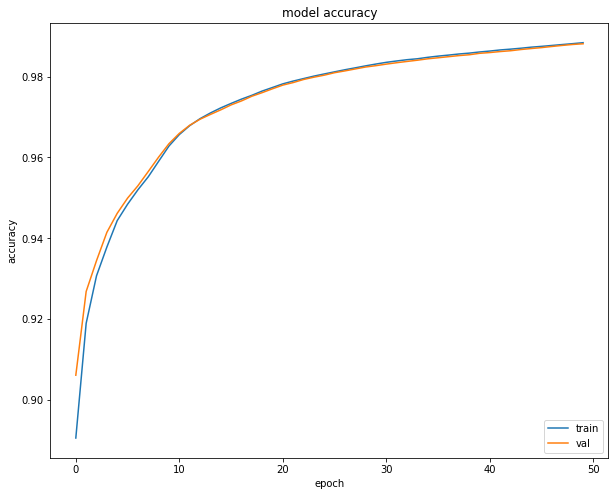

In [78]:
#Plotting the LSTM model's accuracy
plot_accuracy(lstm_acc)

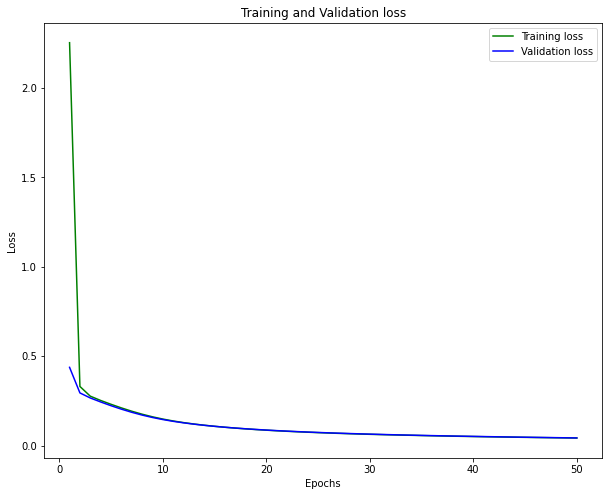

In [79]:
#Plotting the LSTM model loss
plot_loss(lstm_acc)

#GRU Custom Accuracy

In [81]:
#model creation
NUM_CLASSES = y_padded.shape[2]
gru_model_acc = Sequential()
gru_model_acc.add(Embedding(input_dim     = VOCABULARY_SIZE,
                        output_dim    = EMBEDDING_SIZE,
                        input_length  = MAX_SEQUENCE,
                        weights       = [embedding_V4],
                        trainable     = False
))
gru_model_acc.add(GRU(64, return_sequences=True))
gru_model_acc.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))
gru_model_acc.compile(loss          = 'categorical_crossentropy',
                      optimizer     = 'adam',
                      metrics       = ['acc',ignore_class_accuracy()])
gru_model_acc.summary()
 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 250, 50)           547450    
                                                                 
 gru_3 (GRU)                 (None, 250, 64)           22272     
                                                                 
 time_distributed_7 (TimeDis  (None, 250, 46)          2990      
 tributed)                                                       
                                                                 
Total params: 572,712
Trainable params: 25,262
Non-trainable params: 547,450
_________________________________________________________________


In [83]:
#Fitting the model
gru_acc = gru_model_acc.fit(X_padded, y_padded, batch_size=128, epochs=50,validation_data=(X_padded_val,y_padded_val))

Epoch 1/50
30/30 [==============================] - 3s 93ms/step - loss: 2.5166 - acc: 0.9116 - ignore_accuracy: 0.9116 - val_loss: 0.5150 - val_acc: 0.9032 - val_ignore_accuracy: 0.9046
Epoch 2/50
30/30 [==============================] - 2s 72ms/step - loss: 0.4062 - acc: 0.9171 - ignore_accuracy: 0.9171 - val_loss: 0.3587 - val_acc: 0.9227 - val_ignore_accuracy: 0.9238
Epoch 3/50
30/30 [==============================] - 2s 71ms/step - loss: 0.3357 - acc: 0.9278 - ignore_accuracy: 0.9279 - val_loss: 0.3195 - val_acc: 0.9354 - val_ignore_accuracy: 0.9366
Epoch 4/50
30/30 [==============================] - 2s 72ms/step - loss: 0.3045 - acc: 0.9381 - ignore_accuracy: 0.9382 - val_loss: 0.2929 - val_acc: 0.9397 - val_ignore_accuracy: 0.9408
Epoch 5/50
30/30 [==============================] - 2s 67ms/step - loss: 0.2795 - acc: 0.9414 - ignore_accuracy: 0.9414 - val_loss: 0.2694 - val_acc: 0.9428 - val_ignore_accuracy: 0.9439
Epoch 6/50
30/30 [==============================] - 2s 67ms/step 

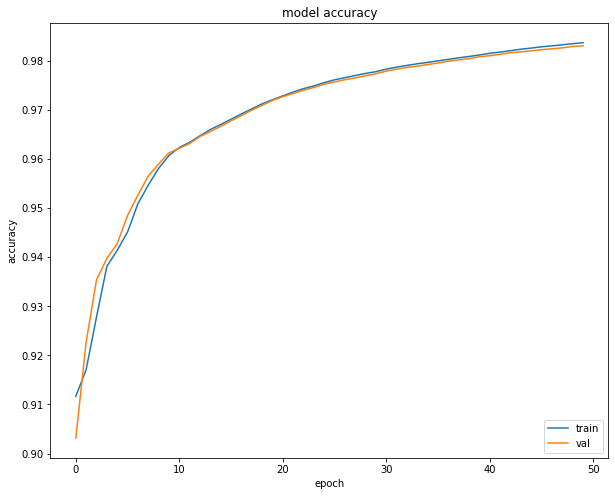

In [84]:
#Plotting GRU model's accuracy
plot_accuracy(gru_acc)

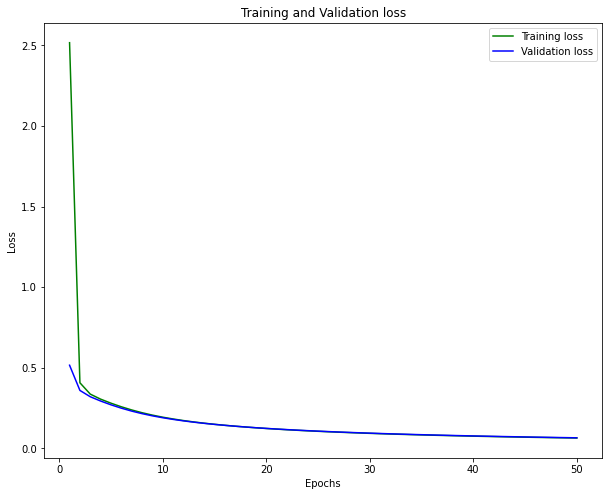

In [85]:
#Plotting GRU model's loss
plot_loss(gru_acc)

#Models' Evaluation

In [86]:
loss, accuracy = lstm_model.evaluate(X_padded_test, y_padded_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

21/21 [==============================] - 1s 39ms/step - loss: 0.0692 - acc: 0.9810
Loss: 0.06919177621603012,
Accuracy: 0.9809922575950623


In [87]:
loss, accuracy = gru_model.evaluate(X_padded_test, y_padded_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

21/21 [==============================] - 0s 21ms/step - loss: 0.0961 - acc: 0.9772
Loss: 0.09606806188821793,
Accuracy: 0.9772403240203857


In [92]:
loss, accuracy, ignore_accuracy = lstm_model_acc.evaluate(X_padded_test, y_padded_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1},\nIgnored_accuracy: {2}".format(loss, accuracy, ignore_accuracy))

21/21 [==============================] - 1s 40ms/step - loss: 0.0369 - acc: 0.9897 - ignore_accuracy: 0.9897
Loss: 0.03694399446249008,
Accuracy: 0.9896743893623352,
Ignored_accuracy: 0.9897356629371643


In [93]:
loss, accuracy, ignore_accuracy = gru_model_acc.evaluate(X_padded_test, y_padded_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1},\nIgnored_accuracy: {2}".format(loss, accuracy, ignore_accuracy))

21/21 [==============================] - 0s 22ms/step - loss: 0.0576 - acc: 0.9853 - ignore_accuracy: 0.9855
Loss: 0.05759715661406517,
Accuracy: 0.9853147268295288,
Ignored_accuracy: 0.9854546785354614


#Showing Predictions

In [102]:
predictions = lstm_model.predict(X_padded_test)

In [103]:
def logits_to_tokens(sequences, dict):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(dict[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

In [104]:
dict_class_id = dict(tokenizer_class_id.index_word)
pred = logits_to_tokens(predictions, dict_class_id)
tr = logits_to_tokens(y_padded_test, dict_class_id)

In [105]:
per=[]
for i in range(0,len(pred)):
  per.append(list(filter(lambda x: x != 0, pred[i])))
print(per[10])

print(df_phrases_test['phrase_class_id'][10])
print(df_phrases_test["phrase"][10])

['dt', 'nnp', 'nnp', 'nnp', 'nnp', 'nnp', 'pos', 'nn', 'to', 'cd', 'nn', 'in', 'cd', 'nn', 'cc', 'to', 'vb', 'vb', 'nnp', 'nnp', 'in', 'vbg', 'dt', 'nn', 'in', 'dt', 'jj', 'nn', '.']
['DT', 'NN', 'VBZ', 'NNP', 'NNP', 'NNP', 'NNP', 'POS', 'NN', 'TO', 'CD', 'NN', 'IN', 'CD', 'NN', 'CC', 'MD', 'VB', 'VB', 'NNP', 'NNP', 'IN', 'VBG', 'DT', 'NN', 'IN', 'DT', 'NNS', 'NN', '.']
['the', 'move', 'boosts', 'Intelogic', 'Chairman', 'Asher', 'Edelman', "'s", 'stake', 'to', '20', '%', 'from', '16.2', '%', 'and', 'may', 'help', 'prevent', 'Martin', 'Ackerman', 'from', 'making', 'a', 'run', 'at', 'the', 'computer-services', 'concern', '.']


#Confusion Matrix


In [ ]:
for i in range(0,len(per)-1):
  for j in (0,len(per[i])-1):
    per[i][j].upper()

In [ ]:
from sklearn.metrics import confusion_matrix
'''def plot_cm(labels, predictions, p=0.5):
  eq =0
  not_eq = 0
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(10,10))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  print(type(cm))
  print(cm.shape)
  for i in range(0,len(cm)-1):
    for j in range(0,len(cm[i])):
      if not cm[i][j] == 0 and i == j:
        eq += cm[i][j]
      elif not cm[i][j] == 0 and i!=j:
        not_eq += cm[i][j]
  print('Correct Labels: ',eq)
  print('Wrong Labels: ', not_eq)'''

cm = confusion_matrix([df_phrases_test['phrase_class_id'].argmax(axis=0)], per.argmax(axis=0)) 
cm.shape

In [ ]:
print(df_phrases_test['phrase_class_id'][10])
cm_df = pd.DataFrame(cm,
                     index = ['NNP','JJ','DT', 'NN', 'VBZ','POS','TO', 'CD','IN','CC', 'MD', 'VB','VBG','NNS', '.'], 
                     columns = ['NNP','JJ','DT', 'NN', 'VBZ','POS','TO', 'CD','IN','CC', 'MD', 'VB','VBG','NNS', '.'])

In [ ]:
from sklearn.metrics import confusion_matrix

plot_cm(df_phrases_test['phrase_class_id'][10], per[10])

In [ ]:
from sklearn.metrics import classification_report
target_names = df_phrases_test['phrase_class_id'][3]
print(classification_report(df_phrases_test['phrase_class_id'][3], per[3], target_names=target_names))